In [ ]:
# Importo librerías
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
# Generación de datos de muestra
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
# Añado ruido a la salida
y[::5] += 2 * (0.5 - np.random.rand(20))

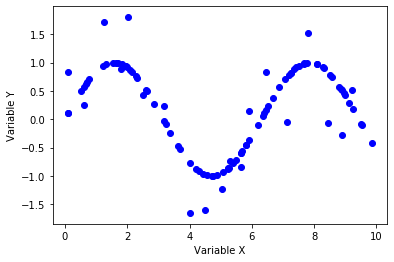

In [ ]:
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

En el siguiente código se generan tres modelos diferentes: uno con un kernel rbf, otro con kernel lineal y otro con kernel polinómico de grado tres. Los datos siguen una forma no lineal, por lo que, previsiblemente el kernel lineal no se comporte correctamente.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
# Ajuste del modelo de regresión
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

svr_lin = SVR(kernel='linear', C=100, gamma='auto')

svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [ ]:
# Análisis de los resultados
lw = 2

In [ ]:
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

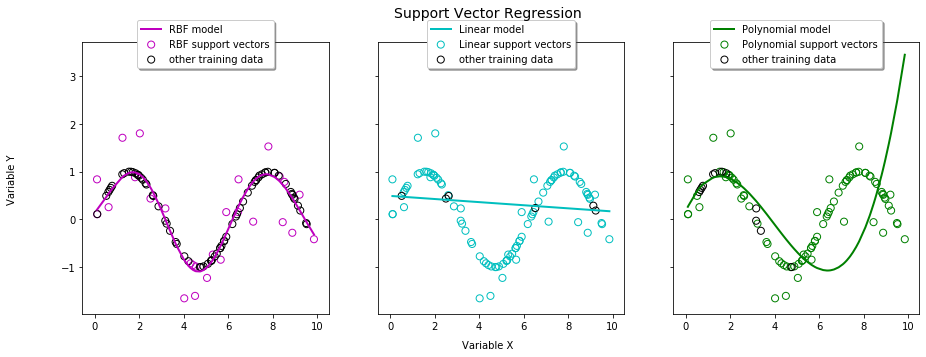

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for ix, svr in enumerate(svrs):
    
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'Variable X', ha='center', va='center')
fig.text(0.06, 0.5, 'Variable Y', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

Se cumple lo que se preveía, el kernel lineal tiene un mal rendimiento en estos datos. El kernel polinómico de grado tres en una parte de los datos se ajusta correctamente y en otra no. Por último, el kernel RBF o Gaussiano se ajusta muy bien a los datos en toda la forma. Como norma general se debería utilizar el kernel RBF ya que se ajusta correctamente a casi cualquier función

## Modelos originales

## Con GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Inicializamos modelo
svr = SVR(verbose=True)

In [ ]:
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
params = {
    "kernel":["linear", "poly", "rbf"],
    "gamma" : ["scale", "auto"],
    "epsilon": [.1, .2],
    "C" : [0.1, 1, 10, 100],
}

In [ ]:
CV = GridSearchCV(svr, params, cv=3)

In [ ]:
CV.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
CV.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
y_cv_pred = CV.predict(X)

In [ ]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y, y_cv_pred))
print('Estadístico R_2: %.2f' % r2_score(y, y_cv_pred))

Error cuadrático medio: 0.07
Estadístico R_2: 0.88
